<h1 align="center"> Dimension Reduction and Feature Selection </h1>

# Import all needed packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading the cleaned data

In [2]:
data = pd.read_csv("./clean_data/cleanedDataPriceDr.csv")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,...,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SalesPrice,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
0,0,0,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,...,2.0,1.0,199904,53,3.0,249900.0,2400.0,80000.0,0.0,52272.0
1,1,1,2.0,1.0,2.0,1.0,1.0,1,4.0,1.0,...,2.0,0.0,199904,39,1.0,139900.0,1192.0,30000.0,596.0,9000.0
2,3,3,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,...,2.0,1.0,199903,58,2.0,271900.0,2376.0,90000.0,0.0,40075.0
3,4,4,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,...,2.0,1.0,199907,40,2.0,320000.0,2600.0,90000.0,0.0,40075.0
4,5,6,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,...,1.0,0.0,199812,31,3.0,163000.0,1120.0,63700.0,0.0,87120.0


In [4]:
#dropping unecessary variables
data=data.iloc[:,2:]

In [5]:
data.head()

,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,ParkingFacility,PrimarySpaceHeatingSystem,...,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SalesPrice,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
0,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,2.0,3.0,...,2.0,1.0,199904,53,3.0,249900.0,2400.0,80000.0,0.0,52272.0
1,2.0,1.0,2.0,1.0,1.0,1,4.0,1.0,4.0,4.0,...,2.0,0.0,199904,39,1.0,139900.0,1192.0,30000.0,596.0,9000.0
2,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,2.0,2.0,...,2.0,1.0,199903,58,2.0,271900.0,2376.0,90000.0,0.0,40075.0
3,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,2.0,2.0,...,2.0,1.0,199907,40,2.0,320000.0,2600.0,90000.0,0.0,40075.0
4,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,1.0,3.0,...,1.0,0.0,199812,31,3.0,163000.0,1120.0,63700.0,0.0,87120.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158470 entries, 0 to 158469
Data columns (total 30 columns):
CentralAir-conditioning             158470 non-null float64
Foundation                          158470 non-null float64
Condominium                         158470 non-null float64
Deck                                158470 non-null float64
DesignofHouse                       158470 non-null float64
Division                            158470 non-null int64
TypeofFinancing                     158470 non-null float64
FinishedBasement                    158470 non-null float64
ParkingFacility                     158470 non-null float64
PrimarySpaceHeatingSystem           158470 non-null float64
MetropolitanArea                    158470 non-null int64
ConstructionMethod                  158470 non-null float64
Patio                               158470 non-null float64
Porch                               158470 non-null float64
Stories                             158470 non-null f

# Method 1: Feature selection based on correlation

In [7]:
data.corr()

,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,ParkingFacility,PrimarySpaceHeatingSystem,...,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SalesPrice,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
CentralAir-conditioning,1.000000,-0.174814,-0.026048,-0.039564,-0.011086,0.176278,-0.012891,0.120075,-0.013789,0.264972,...,-0.103157,0.057701,-0.112201,0.001203,0.229112,0.027688,-0.113968,0.079401,-0.006477,-0.012233
Foundation,-0.174814,1.000000,-0.000123,0.393329,0.014647,0.463536,0.098806,-0.904851,-0.088049,-0.280371,...,0.048395,-0.257732,-0.012684,0.130275,-0.332864,-0.178501,-0.078993,-0.181337,-0.309021,-0.249049
Condominium,-0.026048,-0.000123,1.000000,0.007515,-0.309770,0.049454,0.014989,-0.009850,0.041509,-0.022263,...,0.061921,-0.023042,0.114131,0.012264,-0.016731,0.032554,0.077921,0.018147,0.007072,0.071775
Deck,-0.039564,0.393329,0.007515,1.000000,-0.038587,0.237670,0.066067,-0.300734,-0.041258,-0.105624,...,-0.054425,-0.145203,0.031340,0.052781,-0.133670,-0.141021,-0.087530,-0.139980,-0.164081,-0.217404
DesignofHouse,-0.011086,0.014647,-0.309770,-0.038587,1.000000,-0.087702,-0.000860,-0.015464,-0.087440,-0.003900,...,-0.105528,0.067073,-0.038913,0.006889,-0.018631,-0.073696,-0.158951,-0.060476,0.018325,-0.156129
Division,0.176278,0.463536,0.049454,0.237670,-0.087702,1.000000,0.039265,-0.475767,0.041612,0.015215,...,0.088807,-0.161957,-0.026993,0.112748,-0.015543,-0.001553,-0.029976,-0.011533,-0.095215,-0.264337
TypeofFinancing,-0.012891,0.098806,0.014989,0.066067,-0.000860,0.039265,1.000000,-0.103425,-0.041622,-0.062980,...,-0.076824,-0.119703,0.103112,0.005683,-0.112438,-0.148139,-0.141417,-0.132481,-0.004300,-0.048588
FinishedBasement,0.120075,-0.904851,-0.009850,-0.300734,-0.015464,-0.475767,-0.103425,1.000000,0.074988,0.296087,...,-0.079563,0.240236,-0.016862,-0.151023,0.345001,0.155513,0.041088,0.161695,0.105912,0.208051
ParkingFacility,-0.013789,-0.088049,0.041509,-0.041258,-0.087440,0.041612,-0.041622,0.074988,1.000000,0.041179,...,0.185963,0.014282,0.031531,-0.032138,0.066869,0.197150,0.204484,0.144984,0.092650,0.130022
PrimarySpaceHeatingSystem,0.264972,-0.280371,-0.022263,-0.105624,-0.003900,0.015215,-0.062980,0.296087,0.041179,1.000000,...,-0.022575,0.150065,-0.143779,-0.076397,0.775109,0.149088,0.026134,0.188524,0.062207,0.007235


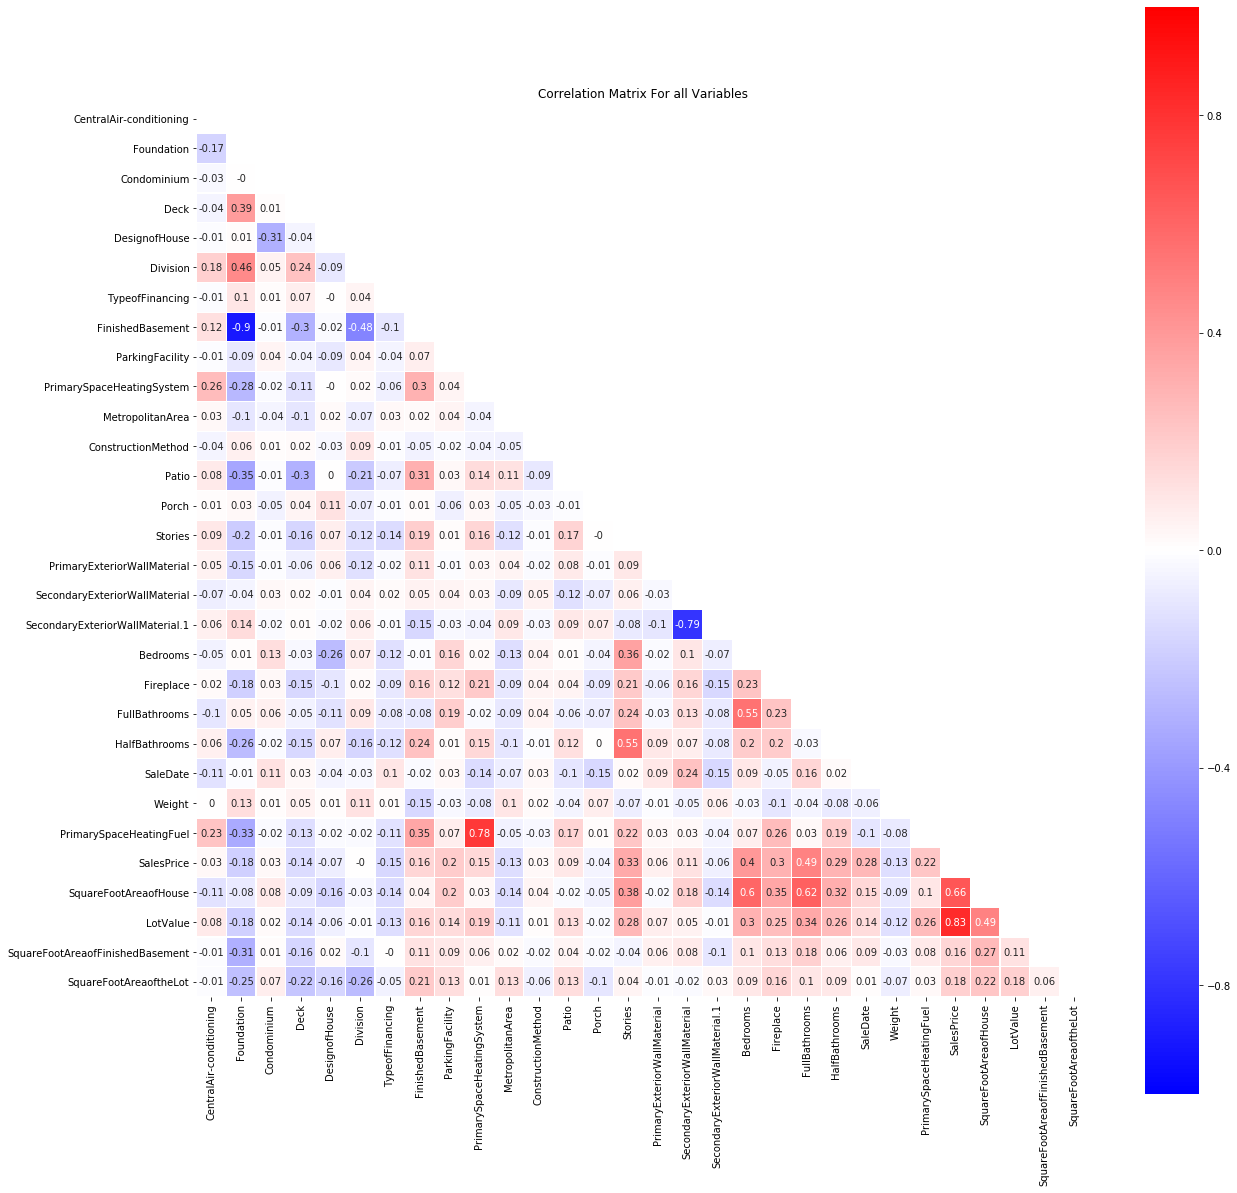

In [8]:
#Heat Map Showing correlations among the varibales
corr = data.corr().round(2)
f, ax = plt.subplots(figsize =(20, 20)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='bwr', mask=mask, annot=True,square=True, linewidths = 0.1,vmin=-1, vmax=1)
plt.title('Correlation Matrix For all Variables')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [9]:
#dropping the response variable: SalesPrice so that to include only the independent variables
data_features=data.drop(['SalesPrice'],axis=1)

In [10]:
data_features.head()

,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,ParkingFacility,PrimarySpaceHeatingSystem,...,Fireplace,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
0,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,2.0,3.0,...,1.0,2.0,1.0,199904,53,3.0,2400.0,80000.0,0.0,52272.0
1,2.0,1.0,2.0,1.0,1.0,1,4.0,1.0,4.0,4.0,...,0.0,2.0,0.0,199904,39,1.0,1192.0,30000.0,596.0,9000.0
2,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,199903,58,2.0,2376.0,90000.0,0.0,40075.0
3,1.0,1.0,2.0,1.0,1.0,1,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,199907,40,2.0,2600.0,90000.0,0.0,40075.0
4,2.0,1.0,2.0,2.0,1.0,1,1.0,2.0,1.0,3.0,...,1.0,1.0,0.0,199812,31,3.0,1120.0,63700.0,0.0,87120.0


In [11]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158470 entries, 0 to 158469
Data columns (total 29 columns):
CentralAir-conditioning             158470 non-null float64
Foundation                          158470 non-null float64
Condominium                         158470 non-null float64
Deck                                158470 non-null float64
DesignofHouse                       158470 non-null float64
Division                            158470 non-null int64
TypeofFinancing                     158470 non-null float64
FinishedBasement                    158470 non-null float64
ParkingFacility                     158470 non-null float64
PrimarySpaceHeatingSystem           158470 non-null float64
MetropolitanArea                    158470 non-null int64
ConstructionMethod                  158470 non-null float64
Patio                               158470 non-null float64
Porch                               158470 non-null float64
Stories                             158470 non-null f

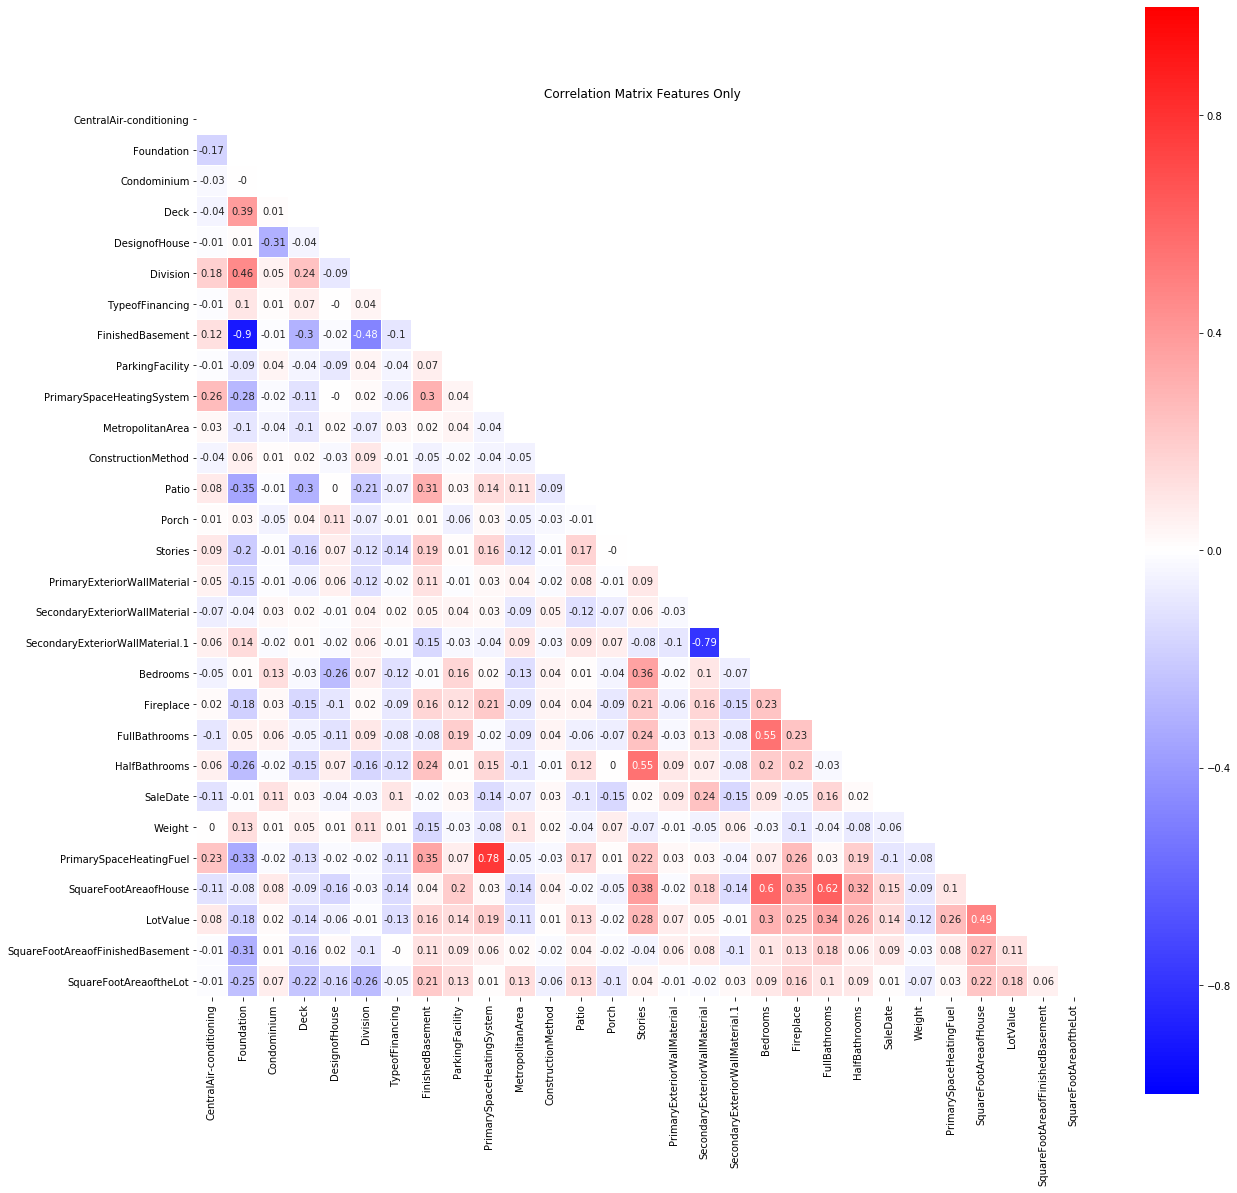

In [12]:
#Heat Map Showing correlations among the features
corr = data_features.corr().round(2)
f, ax = plt.subplots(figsize =(20, 20)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='bwr', mask=mask, annot=True,square=True, linewidths = 0.1,vmin=-1, vmax=1)
plt.title('Correlation Matrix Features Only')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Removing highly correlated features (with an absolute correlation greater than 0.6)
<u>The threshold of 0.6 is recommended by:</u> Reddy, C., Balasubramanyam, P., & Subbarayudu, M. (2013). An effective approach to resolve multicollinearity in agriculture data. International journal of research in electronics and computer engineering, 1(1), 27-30.

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.6:
            if columns[j]:
                columns[j] = False

### Removed features

In [14]:
removed_columns = data_features.columns[[not columns[i] for i in range(len(columns))]]
removed_columns

Index(['FinishedBasement', 'SecondaryExteriorWallMaterial.1',
       'PrimarySpaceHeatingFuel', 'SquareFootAreaofHouse'],
      dtype='object')

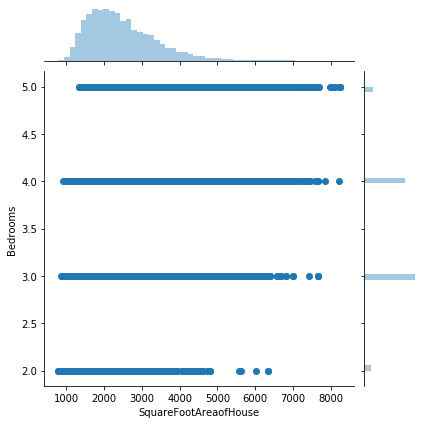

In [15]:
#visulization of the high correlation between the removed features
sns.jointplot(data_features['SquareFootAreaofHouse'], data_features['Bedrooms'], marker='o')

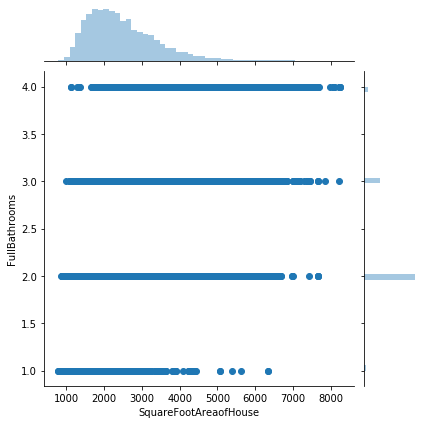

In [16]:
#visulization of the high correlation between the removed features
sns.jointplot(data_features['SquareFootAreaofHouse'], data_features['FullBathrooms'], marker='o')

### Selected features

In [17]:
selected_columns = data_features.columns[columns]
selected_columns

Index(['CentralAir-conditioning', 'Foundation', 'Condominium', 'Deck',
       'DesignofHouse', 'Division', 'TypeofFinancing', 'ParkingFacility',
       'PrimarySpaceHeatingSystem', 'MetropolitanArea', 'ConstructionMethod',
       'Patio', 'Porch', 'Stories', 'PrimaryExteriorWallMaterial',
       'SecondaryExteriorWallMaterial', 'Bedrooms', 'Fireplace',
       'FullBathrooms', 'HalfBathrooms', 'SaleDate', 'Weight', 'LotValue',
       'SquareFootAreaofFinishedBasement', 'SquareFootAreaoftheLot'],
      dtype='object')

In [18]:
data_reduced_features = data_features[selected_columns]

In [19]:
data_reduced_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158470 entries, 0 to 158469
Data columns (total 25 columns):
CentralAir-conditioning             158470 non-null float64
Foundation                          158470 non-null float64
Condominium                         158470 non-null float64
Deck                                158470 non-null float64
DesignofHouse                       158470 non-null float64
Division                            158470 non-null int64
TypeofFinancing                     158470 non-null float64
ParkingFacility                     158470 non-null float64
PrimarySpaceHeatingSystem           158470 non-null float64
MetropolitanArea                    158470 non-null int64
ConstructionMethod                  158470 non-null float64
Patio                               158470 non-null float64
Porch                               158470 non-null float64
Stories                             158470 non-null float64
PrimaryExteriorWallMaterial         158470 non-null f

In [20]:
data_reduced=pd.concat([data['SalesPrice'],data_reduced_features],axis=1)

### Correlation matrix for the selected features

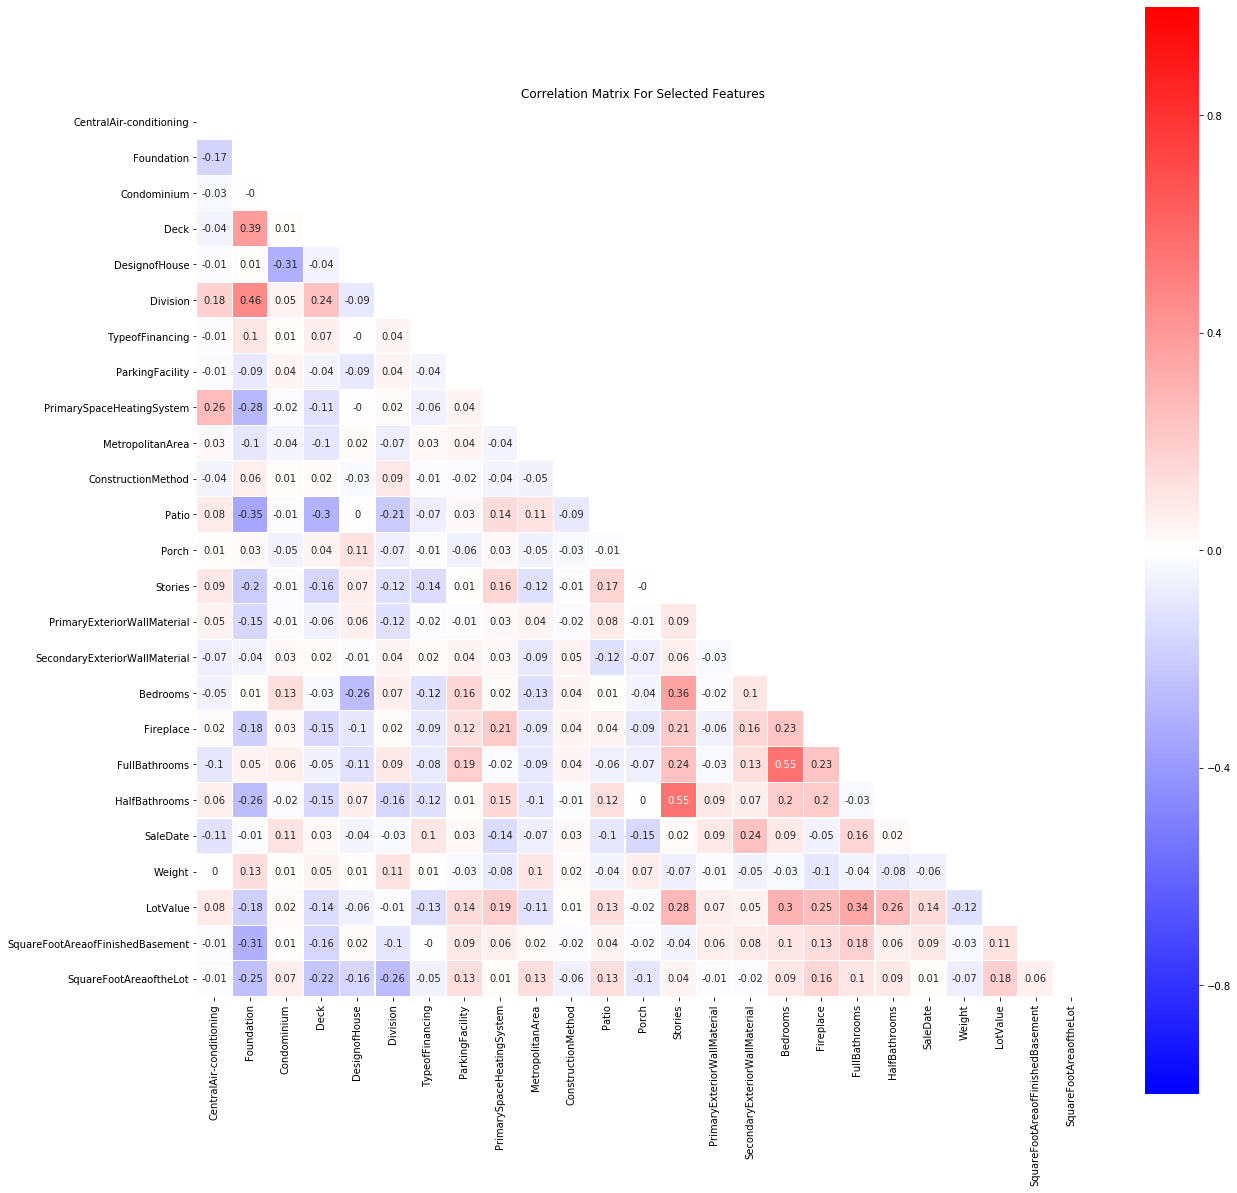

In [21]:
#Checking
corr = data_reduced_features.corr().round(2)
f, ax = plt.subplots(figsize =(20, 20)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='bwr', mask=mask, annot=True,square=True, linewidths = 0.1,vmin=-1, vmax=1)
plt.title('Correlation Matrix For Selected Features')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Method 2: Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

## Normalize the data

In [23]:
data_norm = scale(data_features)

In [24]:
## Descrptive statistics
pd.DataFrame(data_norm,columns=list(data_features.columns)).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,158470.0,1.212411e-16,1.000003,-0.310687,-0.310687,-0.310687,-0.310687,3.218673
Foundation,158470.0,3.873976e-17,1.000003,-1.331719,-1.331719,0.841092,0.841092,1.927497
Condominium,158470.0,-2.381778e-16,1.000003,-6.196838,0.161373,0.161373,0.161373,0.161373
Deck,158470.0,-1.847312e-16,1.000003,-1.746259,0.572653,0.572653,0.572653,0.572653
DesignofHouse,158470.0,-1.598015e-16,1.000003,-0.260991,-0.260991,-0.260991,-0.260991,3.831551
Division,158470.0,-4.878340e-17,1.000003,-2.176950,-0.770058,-0.301093,0.636835,1.574763
TypeofFinancing,158470.0,2.869612e-17,1.000003,-0.439894,-0.439894,-0.439894,-0.439894,4.109991
FinishedBasement,158470.0,7.747951e-17,1.000003,-0.679461,-0.679461,-0.679461,1.592314,1.592314
ParkingFacility,158470.0,2.657978e-16,1.000003,-2.071676,-0.419860,-0.419860,1.231957,2.883773
PrimarySpaceHeatingSystem,158470.0,-8.824056e-17,1.000003,-1.419988,-1.419988,0.507442,0.507442,4.362302


From the above descriptive statistics, we can see that the standardization process converts all variables into ones that have 0 as mean and 1 as standard error.

In [25]:
pd.DataFrame(data_norm).corr()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.000000,-0.174814,-0.026048,-0.039564,-0.011086,0.176278,-0.012891,0.120075,-0.013789,0.264972,...,0.024447,-0.103157,0.057701,-0.112201,0.001203,0.229112,-0.113968,0.079401,-0.006477,-0.012233
1,-0.174814,1.000000,-0.000123,0.393329,0.014647,0.463536,0.098806,-0.904851,-0.088049,-0.280371,...,-0.176260,0.048395,-0.257732,-0.012684,0.130275,-0.332864,-0.078993,-0.181337,-0.309021,-0.249049
2,-0.026048,-0.000123,1.000000,0.007515,-0.309770,0.049454,0.014989,-0.009850,0.041509,-0.022263,...,0.027610,0.061921,-0.023042,0.114131,0.012264,-0.016731,0.077921,0.018147,0.007072,0.071775
3,-0.039564,0.393329,0.007515,1.000000,-0.038587,0.237670,0.066067,-0.300734,-0.041258,-0.105624,...,-0.145857,-0.054425,-0.145203,0.031340,0.052781,-0.133670,-0.087530,-0.139980,-0.164081,-0.217404
4,-0.011086,0.014647,-0.309770,-0.038587,1.000000,-0.087702,-0.000860,-0.015464,-0.087440,-0.003900,...,-0.097924,-0.105528,0.067073,-0.038913,0.006889,-0.018631,-0.158951,-0.060476,0.018325,-0.156129
5,0.176278,0.463536,0.049454,0.237670,-0.087702,1.000000,0.039265,-0.475767,0.041612,0.015215,...,0.019510,0.088807,-0.161957,-0.026993,0.112748,-0.015543,-0.029976,-0.011533,-0.095215,-0.264337
6,-0.012891,0.098806,0.014989,0.066067,-0.000860,0.039265,1.000000,-0.103425,-0.041622,-0.062980,...,-0.091449,-0.076824,-0.119703,0.103112,0.005683,-0.112438,-0.141417,-0.132481,-0.004300,-0.048588
7,0.120075,-0.904851,-0.009850,-0.300734,-0.015464,-0.475767,-0.103425,1.000000,0.074988,0.296087,...,0.160278,-0.079563,0.240236,-0.016862,-0.151023,0.345001,0.041088,0.161695,0.105912,0.208051
8,-0.013789,-0.088049,0.041509,-0.041258,-0.087440,0.041612,-0.041622,0.074988,1.000000,0.041179,...,0.118469,0.185963,0.014282,0.031531,-0.032138,0.066869,0.204484,0.144984,0.092650,0.130022
9,0.264972,-0.280371,-0.022263,-0.105624,-0.003900,0.015215,-0.062980,0.296087,0.041179,1.000000,...,0.214527,-0.022575,0.150065,-0.143779,-0.076397,0.775109,0.026134,0.188524,0.062207,0.007235


Normalization does not change the correlation between variables. 

## Full Component Solution

In [26]:
# Select the number of components
pca1 = PCA(n_components=data_norm.shape[1])

# Fit the PCA model
pca1.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

print(var)

[0.14196901 0.10057923 0.06695512 0.06320888 0.05336884 0.04233401
 0.03959372 0.0374194  0.03669772 0.03479291 0.03285075 0.0306938
 0.02966927 0.0293384  0.02895869 0.02805975 0.02690102 0.02636173
 0.0233884  0.02221491 0.02136498 0.01926914 0.01489153 0.01324915
 0.01121878 0.00883805 0.00747033 0.0062604  0.00208208]


In [28]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 14.2   24.26  30.96  37.28  42.62  46.85  50.81  54.55  58.22  61.7
  64.99  68.06  71.03  73.96  76.86  79.67  82.36  85.    87.34  89.56
  91.7   93.63  95.12  96.44  97.56  98.44  99.19  99.82 100.03]


Draw a scree plot to show the cumulative variance explained along the number of principal components.

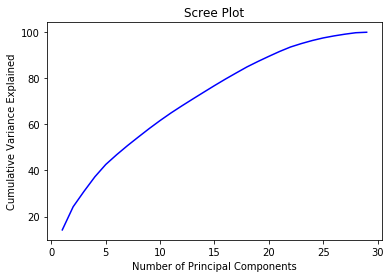

In [29]:
var1 = pd.DataFrame(var1, index=np.arange(1,data_norm.shape[1]+1))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

From the above plot, we can see that if we choose a 21-component solution, the explained variance would be > 90%. That is to say, 21 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 30 variables in the original dataset. This would be a good solution. Now, let's do the PCA with 21 components.

## A 21-components solution

In [30]:
# Select the number of components
pca21 = PCA(n_components=21)
pca21.fit(data_norm)
data_pca21 = pca21.transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca21 = pd.DataFrame(data_pca21)
data_pca21.columns = ["PC"+str(i) for i in range(1,22)]

# Show the head of the DataFrame
data_pca21.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,3.966409,3.098135,1.536202,-0.719670,-0.024998,-0.604036,-1.457840,-0.592629,0.601160,-0.233442,...,-0.581721,1.649077,0.348564,0.977363,-0.171931,0.722203,0.098954,-0.372240,1.217425,0.281594
1,0.809342,4.789223,0.617063,-0.742993,-2.600877,1.850685,2.405158,-2.673163,1.685595,7.903618,...,1.401238,-2.035444,-0.748087,-1.239452,-1.404394,0.545355,1.287064,-1.149152,1.093830,0.864453
2,2.771178,2.401507,1.399615,-0.742113,-0.115520,-1.499750,0.061721,0.393513,-0.651949,-0.142224,...,-0.077558,-1.681224,0.488269,1.285135,0.336724,-0.868109,1.155551,0.119900,0.288117,-1.658906
3,2.771367,2.791631,0.330812,-1.621961,0.883936,-0.730055,-1.416929,-0.508794,0.261854,-0.437842,...,-0.335651,0.301020,-0.134702,0.805237,-0.185775,1.108373,0.135282,-0.101885,0.175473,0.141624
4,1.715787,5.277321,1.648545,0.265489,-2.261360,-1.152095,-1.167929,-1.114638,-0.035043,-0.071544,...,-0.129511,-0.153751,0.668074,4.049474,1.243216,0.622983,0.740992,0.603734,1.298898,-1.730778
5,3.599860,2.327196,-0.941273,-1.150973,0.461249,-0.658577,-1.945001,0.021881,-0.045156,0.106903,...,-0.679070,0.324553,-0.231470,1.867916,0.209909,1.688205,0.239014,0.284878,1.047027,-0.328250
6,2.407435,2.885045,0.151118,-1.508024,0.407956,-0.894569,-1.086308,0.372037,-0.548141,-0.764556,...,0.377936,0.567531,0.511375,-0.108723,-0.440609,0.549949,0.877517,-0.391130,0.404353,-0.083749
7,4.480031,2.935009,2.006275,-1.070366,-0.519742,-0.528219,-0.285301,-0.338504,-0.280256,0.302077,...,-1.407941,-1.552789,-0.726301,1.549771,0.627901,1.089558,0.232452,-0.531144,1.076271,-0.288408
8,2.423144,4.066748,1.748331,0.480150,0.843517,-1.493327,0.566760,-0.704526,0.708092,-0.702051,...,0.749283,-0.887561,-1.324433,1.663450,0.836925,-0.475634,-0.452320,-0.624325,0.834138,0.170456
9,3.759498,3.013426,1.682043,-0.111942,0.314179,-0.646670,-1.165375,-1.041328,0.717326,-0.454787,...,-0.236117,1.560446,-0.194736,0.323268,-0.644765,0.230910,-0.282016,-0.455655,0.488731,0.624290


In [31]:
#Run a correlation analysis on the dimension-reducted dataset
data_pca21.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
PC1,1.000000e+00,3.697651e-16,1.299694e-15,-4.270715e-16,3.974277e-16,-1.259666e-15,-2.040632e-16,2.311102e-16,4.478004e-16,-1.230674e-16,...,-7.150993e-16,-2.014414e-17,-4.437421e-16,-5.073606e-17,-6.226307e-16,1.729214e-16,4.523094e-16,3.088632e-16,2.411055e-16,7.398544e-16
PC2,3.697651e-16,1.000000e+00,-2.477720e-15,2.913055e-16,-9.243505e-17,-1.508058e-16,5.053331e-16,2.639759e-16,4.776835e-16,4.865126e-17,...,-3.751452e-16,-4.322449e-18,1.009876e-15,2.943631e-16,-5.628154e-16,3.620947e-16,-3.838225e-16,-5.899231e-16,1.295005e-16,1.304409e-16
PC3,1.299694e-15,-2.477720e-15,1.000000e+00,3.425887e-16,-5.364423e-18,3.168039e-16,1.451727e-15,-7.008803e-18,-6.903138e-17,-1.088438e-16,...,2.523338e-16,1.168009e-15,-9.588387e-18,4.404450e-16,-1.281171e-16,-5.887092e-16,3.134395e-16,-8.140850e-17,1.155056e-16,-1.928684e-16
PC4,-4.270715e-16,2.913055e-16,3.425887e-16,1.000000e+00,3.542124e-16,-2.059053e-16,-1.572645e-15,-6.446373e-16,-1.308842e-16,-1.731799e-16,...,1.256369e-16,7.889032e-16,1.289208e-16,2.813077e-16,3.675084e-16,5.647827e-16,-4.657583e-16,-5.263207e-16,3.283996e-16,-3.251373e-16
PC5,3.974277e-16,-9.243505e-17,-5.364423e-18,3.542124e-16,1.000000e+00,-1.451799e-15,-4.356120e-16,-8.377358e-16,-8.637397e-16,4.253013e-16,...,-4.283084e-16,7.413064e-16,-1.203032e-16,2.227859e-17,8.457307e-17,-8.701685e-16,-4.230882e-16,-3.462357e-16,5.991121e-16,2.842508e-16
PC6,-1.259666e-15,-1.508058e-16,3.168039e-16,-2.059053e-16,-1.451799e-15,1.000000e+00,-1.043300e-16,-1.105208e-16,-3.046350e-15,-5.094878e-15,...,2.074557e-15,1.519068e-15,2.939430e-16,1.345982e-16,-1.609928e-15,-1.316906e-15,-2.660168e-16,5.176191e-16,1.879267e-16,-1.178233e-15
PC7,-2.040632e-16,5.053331e-16,1.451727e-15,-1.572645e-15,-4.356120e-16,-1.043300e-16,1.000000e+00,2.401513e-16,5.194212e-16,-1.326326e-15,...,-4.853450e-16,2.394245e-16,6.601066e-17,-5.635044e-16,-1.074786e-16,3.742389e-16,-6.753125e-16,-2.516995e-16,1.033712e-15,-3.785155e-16
PC8,2.311102e-16,2.639759e-16,-7.008803e-18,-6.446373e-16,-8.377358e-16,-1.105208e-16,2.401513e-16,1.000000e+00,-1.441027e-15,1.171950e-15,...,-1.553165e-15,1.663827e-15,-4.935481e-17,-3.615816e-16,-1.490394e-15,-3.805915e-16,1.421204e-16,-4.024124e-16,4.355863e-16,5.547743e-16
PC9,4.478004e-16,4.776835e-16,-6.903138e-17,-1.308842e-16,-8.637397e-16,-3.046350e-15,5.194212e-16,-1.441027e-15,1.000000e+00,-4.269244e-16,...,-5.173548e-16,-8.626914e-16,-1.338503e-15,-5.621458e-17,-3.693916e-16,5.766413e-16,-9.792064e-16,5.793857e-16,1.027467e-15,-8.770373e-16
PC10,-1.230674e-16,4.865126e-17,-1.088438e-16,-1.731799e-16,4.253013e-16,-5.094878e-15,-1.326326e-15,1.171950e-15,-4.269244e-16,1.000000e+00,...,1.130006e-15,3.961608e-16,9.001005e-16,1.026359e-15,-6.172796e-16,-2.051198e-17,-2.027865e-16,-4.269874e-16,3.425527e-16,2.029457e-17


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

PCA applies a linear transformation to transform the data to a new space with fewer dimensions. Let's show the loadings for the 1st principal component and explore how the 1st principal component is calculated from the normalized data.

In [32]:
# Show the loadings for the 1st components
pca21.components_[[0]]

array([[ 0.05977231, -0.33073835,  0.02786214, -0.20655243, -0.0531056 ,
        -0.15887224, -0.11492912,  0.3079527 ,  0.11246108,  0.21648258,
        -0.04165098, -0.01909207,  0.16283005, -0.03977322,  0.27709161,
         0.06427862,  0.10407639, -0.12086575,  0.2231186 ,  0.24280022,
         0.18746281,  0.25654115,  0.04159117, -0.11079635,  0.25903487,
         0.29794761,  0.28033722,  0.15414709,  0.17181029]])

## A 2-components solution

In [33]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,3.966418,3.098248
1,0.809401,4.788184
2,2.771176,2.401540
3,2.771378,2.791564
4,1.715821,5.277160


We can show the loading (or called weight) vectors to better understand the mapping from original variables to the components.

In [34]:
pd.DataFrame(pca2.components_.transpose(),
             index=data_features.columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
CentralAir-conditioning,0.059772,0.150475
Foundation,-0.330738,-0.312486
Condominium,0.027862,-0.112666
Deck,-0.206553,-0.165274
DesignofHouse,-0.053105,0.143436
Division,-0.158872,-0.238818
TypeofFinancing,-0.114930,0.002617
FinishedBasement,0.307952,0.312881
ParkingFacility,0.112460,-0.097212
PrimarySpaceHeatingSystem,0.216483,0.175140


Since we have two components, we can draw a scatter plot to show the reduced dataset.

Actually, one popular use of PCA is to reduce dimension to two, thus allowing us to plot a multi-dimensional data on a 2D space.

Text(0, 0.5, 'Component 2')

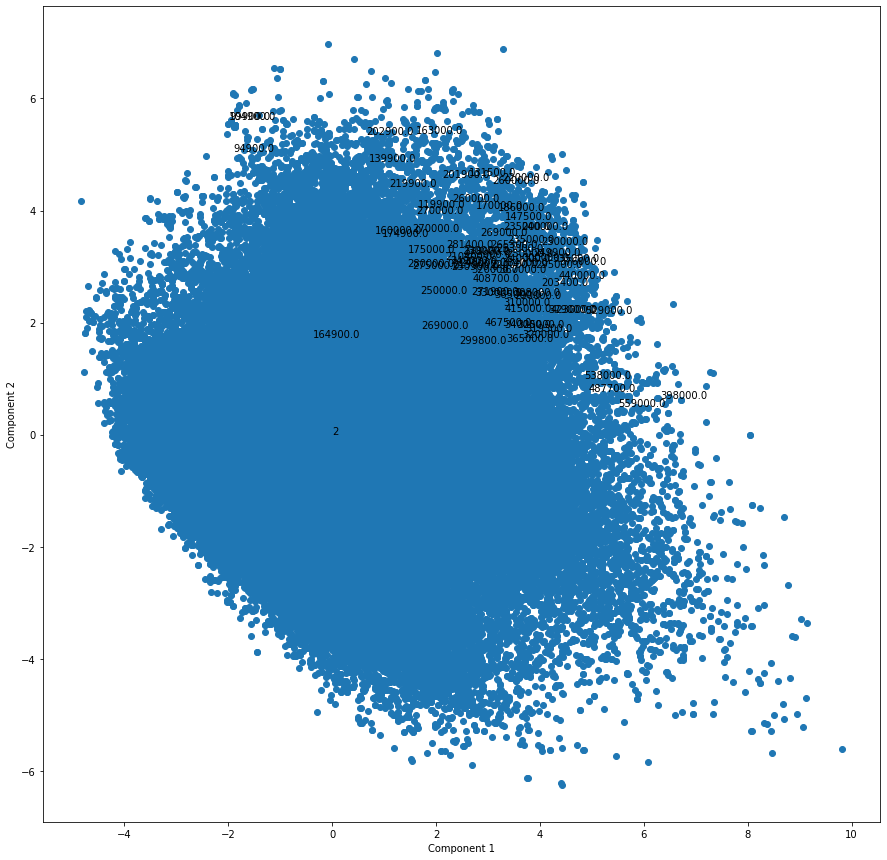

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(data_pca2['PC1'], data_pca2['PC2'])

ax.annotate(2,(0,0))

for i in np.arange(0,77):
    ax.annotate(data.SalesPrice[i],(data_pca2.loc[i,'PC1']-0.1,data_pca2.loc[i,'PC2']+0.1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')